# Your Title Here

**Name(s)**: Viki Shi

**Website Link**: https://viki-sh.github.io/League-Analysis/

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
pd.options.plotting.backend = 'plotly'

import requests
import pandas as pd
import bs4

from dsc80_utils import * 

## Step 1: Introduction

In [2]:
"""
Welcome to League of Legends—a video game developed and published by Riot Games, widely regarded as one of the greatest video games ever made. Beyond its popularity as a game, League of Legends is the world’s largest esport, with professional tournaments drawing hundreds of millions of viewers.

This analysis examines eight years of professional League of Legends matches to explore a central question:

Do pre-game decisions impact match outcomes?

In League of Legends, two teams of five players compete to destroy the enemy’s Nexus, their home base. With over 150 playable champions, in-game items, a gold economy, jungle monsters, and various team roles, the game is highly complex. However, for the purpose of this analysis, we focus solely on pre-game factors, which include:

Role selection
Champion selection
Champion bans
Team side assignment (Red or Blue)
By analyzing how these pre-game choices influence match outcomes, we aim to determine whether a game is significantly influenced before it even begins."

"""

'\nWelcome to League of Legends—a video game developed and published by Riot Games, widely regarded as one of the greatest video games ever made. Beyond its popularity as a game, League of Legends is the world’s largest esport, with professional tournaments drawing hundreds of millions of viewers.\n\nThis analysis examines eight years of professional League of Legends matches to explore a central question:\n\nDo pre-game decisions impact match outcomes?\n\nIn League of Legends, two teams of five players compete to destroy the enemy’s Nexus, their home base. With over 150 playable champions, in-game items, a gold economy, jungle monsters, and various team roles, the game is highly complex. However, for the purpose of this analysis, we focus solely on pre-game factors, which include:\n\nRole selection\nChampion selection\nChampion bans\nTeam side assignment (Red or Blue)\nBy analyzing how these pre-game choices influence match outcomes, we aim to determine whether a game is significantly

## Step 2: Data Cleaning and Exploratory Data Analysis

In [3]:
df_2017 = pd.read_csv("2017_LoL_esports_match_data_from_OraclesElixir.csv")
df_2019 = pd.read_csv("2019_LoL_esports_match_data_from_OraclesElixir.csv")
df_2020 = pd.read_csv("2020_LoL_esports_match_data_from_OraclesElixir.csv")
df_2021 = pd.read_csv("2021_LoL_esports_match_data_from_OraclesElixir.csv")
df_2022 = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir.csv")
df_2024 = pd.read_csv("2024_LoL_esports_match_data_from_OraclesElixir.csv")
df_2025 = pd.read_csv("2025_LoL_esports_match_data_from_OraclesElixir.csv")

def clean(df):
    df = df.copy()    
    df = df[['teamname','league', 'year', 'gameid', 'side', 'champion','ban1', 'ban2', 'ban3', 'ban4','ban5','result',  "goldat10", "xpat10", "csat10", "opp_goldat10", "opp_xpat10", "opp_csat10",
    "golddiffat10", "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", "deathsat10",
    "opp_killsat10", "opp_assistsat10", "opp_deathsat10", "goldat15", "xpat15", "csat15", "opp_goldat15", "opp_xpat15", "opp_csat15", 'golddiffat15', 'xpdiffat15', 'csdiffat15','killsat15','assistsat15',	'deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15'
    ,"goldat20", "xpat20", "csat20", "opp_goldat20", "opp_xpat20", "opp_csat20", 'golddiffat20', 'xpdiffat20', 'csdiffat20','killsat20','assistsat20',	'deathsat20','opp_killsat20','opp_assistsat20','opp_deathsat20'
    ,"goldat25", "xpat25", "csat25", "opp_goldat25", "opp_xpat25", "opp_csat25", 'golddiffat25', 'xpdiffat25', 'csdiffat25','killsat25','assistsat25',	'deathsat25','opp_killsat25','opp_assistsat25','opp_deathsat25']]

    df_picks = df.groupby(['gameid', 'side'])['champion'].apply(list).reset_index()
    df_picks[['pick1', 'pick2', 'pick3', 'pick4', 'pick5']] = pd.DataFrame(df_picks['champion'].apply(lambda x: x[:5]).to_list())

    df_picks = df_picks.drop(columns=['champion'])

    df_bans = df[['teamname','league', 'year', 'gameid', 'side', 'champion','ban1', 'ban2', 'ban3', 'ban4','ban5','result',  "goldat10", "xpat10", "csat10", "opp_goldat10", "opp_xpat10", "opp_csat10",
    "golddiffat10", "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", "deathsat10",
    "opp_killsat10", "opp_assistsat10", "opp_deathsat10", "goldat15", "xpat15", "csat15", "opp_goldat15", "opp_xpat15", "opp_csat15", 'golddiffat15', 'xpdiffat15', 'csdiffat15','killsat15','assistsat15',	'deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15'
    ,"goldat20", "xpat20", "csat20", "opp_goldat20", "opp_xpat20", "opp_csat20", 'golddiffat20', 'xpdiffat20', 'csdiffat20','killsat20','assistsat20',	'deathsat20','opp_killsat20','opp_assistsat20','opp_deathsat20'
    ,"goldat25", "xpat25", "csat25", "opp_goldat25", "opp_xpat25", "opp_csat25", 'golddiffat25', 'xpdiffat25', 'csdiffat25','killsat25','assistsat25',	'deathsat25','opp_killsat25','opp_assistsat25','opp_deathsat25']]
    df_bans = df_bans.groupby(['gameid', 'side'], as_index=False).first()

    df = df_picks.merge(df_bans, on = ['gameid', 'side'], how = 'left').dropna(how='all')
    df =df[['teamname','league', 'year', 'gameid', 'side', 'champion','ban1', 'ban2', 'ban3', 'ban4','ban5','pick1', 'pick2','pick3','pick4','pick5','result',  "goldat10", "xpat10", "csat10", "opp_goldat10", "opp_xpat10", "opp_csat10",
    "golddiffat10", "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", "deathsat10",
    "opp_killsat10", "opp_assistsat10", "opp_deathsat10", "goldat15", "xpat15", "csat15", "opp_goldat15", "opp_xpat15", "opp_csat15", 'golddiffat15', 'xpdiffat15', 'csdiffat15','killsat15','assistsat15',	'deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15'
    ,"goldat20", "xpat20", "csat20", "opp_goldat20", "opp_xpat20", "opp_csat20", 'golddiffat20', 'xpdiffat20', 'csdiffat20','killsat20','assistsat20',	'deathsat20','opp_killsat20','opp_assistsat20','opp_deathsat20'
    ,"goldat25", "xpat25", "csat25", "opp_goldat25", "opp_xpat25", "opp_csat25", 'golddiffat25', 'xpdiffat25', 'csdiffat25','killsat25','assistsat25',	'deathsat25','opp_killsat25','opp_assistsat25','opp_deathsat25']]
    return df
clean(df_2017)

cleaned_2017_to_15 = clean(df_2017)
cleaned_2017_to_15.to_csv("cleaned_2017.csv")

cleaned_2019_to_15 = clean(df_2019)
cleaned_2019_to_15.to_csv("cleaned_2019.csv")

cleaned_2020_to_15 = clean(df_2020)
cleaned_2020_to_15.to_csv("cleaned_2020.csv")

cleaned_2021_to_15 = clean(df_2021)
cleaned_2021_to_15.to_csv("cleaned_2021.csv")

cleaned_2022_to_15 = clean(df_2022)
cleaned_2022_to_15.to_csv("cleaned_2022.csv")

cleaned_2024_to_15 = clean(df_2024)
cleaned_2024_to_15.to_csv("cleaned_2024.csv")

cleaned_2025_to_15 = clean(df_2025)
cleaned_2025_to_15.to_csv("cleaned_2025.csv")

combined_cleaned = pd.concat([cleaned_2017_to_15, cleaned_2019_to_15, cleaned_2020_to_15, cleaned_2021_to_15, cleaned_2022_to_15, cleaned_2024_to_15, cleaned_2025_to_15])
combined_cleaned.to_csv("complete_cleaned_to_25.csv")

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\2314008900.py:5: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\2314008900.py:6: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\2314008900.py:7: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
url = "https://www.counterstats.net/"
req = requests.get(url)
soup = bs4.BeautifulSoup(req.text)
divs = soup.find_all('span', class_ = 'name')
names = [div.text.lower().replace(" ", "-").replace("'", "") for div in divs]

df = pd.read_csv('complete_cleaned.csv')

def format_champion(champ):
    if pd.isna(champ):  
        return None  
    return champ.lower().replace(" ", "-").replace("'", "")

# Apply function to each element in the selected columns
cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']
df[cols] = df[cols].applymap(format_champion)

# Display head of the DataFrame
df.head()

def wr(names, df, columns_to_check):    

    wr_dict = {} 

    for name in names:  
        games_with_name = df[df[columns_to_check].isin([name]).any(axis=1)]
        num_wins = games_with_name[games_with_name['result'] == 1].shape[0]
        
        total_games = games_with_name.shape[0]

        win_rate = num_wins / total_games if total_games > 0 else 0
        if name == 'nunu-&-willump': 
            wr_dict['nunu-willump'] = win_rate
            continue
        if name == 'dr.-mundo': 
            wr_dict['dr-mundo'] = win_rate
            continue

        
        wr_dict[name] = win_rate
        
    return wr_dict

champ_wr = wr(names, df, ['pick1', 'pick2', 'pick3', 'pick4', 'pick5'])

def download_page(champ):
    url = f'https://www.counterstats.net/league-of-legends/{champ}'
    request = requests.get(url)
    return bs4.BeautifulSoup(request.text, 'html.parser')


def parse(names):
    data = []
    
    for name in names:
        print(name)

        name = name.replace("nunu-&-willump", "nunu-willump").replace("dr.-mundo", "dr-mundo")

        soup = download_page(name)  
        
        counters_champ_div = soup.find_all("div", class_='champ-box')[0]
        champ_counter_div = soup.find_all("div", class_='champ-box')[1]


        champ_counters = []
        counters_champ = []

        for i in range(5): 

            divs = counters_champ_div.find_all("div", class_='win-wrap')
            
            div = divs[i]
            
            champion_tag = div.find("span", class_="champion").text.strip()

            win_tag = div.find("span", class_="win").find("span", class_="b").text
            win_percent = 100-int(win_tag.replace("%", ""))

            counters_champ.append((champion_tag, win_percent))

        for i in range(5): 
            divs = champ_counter_div.find_all("div", class_='win-wrap')

            div = divs[i]
            
            champion_tag = div.find("span", class_="champion").text

            win_tag = div.find("span", class_="win").find("span", class_="b").text
            win_percent = 100-int(win_tag.replace("%", ""))

            champ_counters.append((champion_tag, win_percent))
        
        for i in range(5): 
            data.append([name, counters_champ[i], champ_counters[i]])
            df = pd.DataFrame(data, columns=["Champion", "counters champ", "champ counters"])
            df.set_index("Champion", inplace=True) 


    return df


result = parse(names)
result['champ_wr'] = wr(names, df, ['pick1', 'pick2', 'pick3', 'pick4', 'pick5'])

result.to_csv('champs_counters_wr.csv')

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\3034233145.py:16: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



darius
kayle
nilah
jinx
nami
sett
warwick
braum
milio
sivir
urgot
cassiopeia
quinn
annie
kogmaw
taric
lulu
karma
thresh
ahri
diana
garen
viktor
tristana
vayne
nocturne
malphite
malzahar
mordekaiser
yuumi
galio
jarvan-iv
master-yi
sion
wukong
amumu
poppy
seraphine
soraka
teemo
xayah
xin-zhao
yorick
bard
briar
fiddlesticks
janna
lissandra
ornn
ryze
velkoz
anivia
aurelion-sol
neeko
nunu-&-willump
taliyah
vex
zilean
heimerdinger
kassadin
kled
naafiri
shyvana
singed
sona
jhin
yasuo
miss-fortune
pantheon
aatrox
kayn
vi
xerath
akali
chogath
ekko
graves
irelia
vladimir
volibear
zyra
syndra
hwei
morgana
orianna
rell
renekton
senna
swain
twitch
zac
brand
camille
dr.-mundo
gwen
lillia
nasus
rakan
riven
samira
shen
tahm-kench
veigar
zeri
akshan
fizz
maokai
trundle
zoe
evelynn
kennen
olaf
qiyana
rammus
ziggs
reksai
ezreal
caitlyn
lee-sin
sylas
viego
ashe
lux
zed
nautilus
varus
jax
jayce
aphelios
elise
gragas
katarina
leblanc
leona
lucian
pyke
shaco
corki
draven
gnar
khazix
talon
alistar
hecarim
twi

In [6]:
import ast  
cleaned_league = pd.read_csv("complete_cleaned_to_25.csv")
counter_df = pd.read_csv("champs_counters_wr.csv")
cleaned_league.head()


def format_champion(champ):
    if pd.isna(champ):  
        return None  
    return champ.lower().replace(" ", "-").replace("'", "").replace("nunu-&-willump", "nunu-willump").replace("dr.-mundo", "dr-mundo")

def get_picks_and_bans(df): 
    blue_picks = df[df['side'] == 'Blue'][['pick1', 'pick2', 'pick3', 'pick4', 'pick5']].values.flatten().tolist()
    red_picks = df[df['side'] == 'Red'][['pick1', 'pick2', 'pick3', 'pick4', 'pick5']].values.flatten().tolist()

    blue_bans = df[df['side'] == 'Blue'][['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].values.flatten().tolist()
    red_bans = df[df['side'] == 'Red'][['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].values.flatten().tolist()

    blue_picks = [format_champion(champ) for champ in blue_picks if pd.notna(champ)]
    red_picks = [format_champion(champ) for champ in red_picks if pd.notna(champ)]
    
    blue_bans = [format_champion(champ) for champ in blue_bans if pd.notna(champ)]
    red_bans = [format_champion(champ) for champ in red_bans if pd.notna(champ)]

    return blue_picks, red_picks, blue_bans, red_bans

def preprocess_counters(counter_df):
    counter_dict = {}
    wr_dict = {}  # Store win rates for each champion

    for _, row in counter_df.iterrows():
        champ = format_champion(row['Champion'])
        wr_dict[champ] = row['champ_wr']  # Store win rate
        
        if pd.notna(row['counters champ']) and isinstance(row['counters champ'], str):
            try:
                counters = ast.literal_eval(row['counters champ'])  
                if isinstance(counters, tuple):  # Ensure it's a tuple before extracting
                    if champ not in counter_dict:
                        counter_dict[champ] = set()
                    counter_dict[champ].add(format_champion(counters[0]))  # Extract champion names
            except (SyntaxError, ValueError):
                continue  # Skip malformed rows
                
    return counter_dict, wr_dict  # Return both counter and win rate dictionaries

def count_counters(df, counter_dict): 
    blue_picks, red_picks, blue_bans, red_bans = get_picks_and_bans(df)

    num_blue_counters = sum(1 for red_champ in red_picks for blue_champ in blue_picks if blue_champ in counter_dict.get(red_champ, set()))
    num_red_counters = sum(1 for blue_champ in blue_picks for red_champ in red_picks if red_champ in counter_dict.get(blue_champ, set()))
    
    num_blue_counters_banned = sum(1 for blue_champ in blue_picks for ban in blue_bans if ban in counter_dict.get(blue_champ, set()))
    num_red_counters_banned = sum(1 for red_champ in red_picks for ban in red_bans if ban in counter_dict.get(red_champ, set()))

    return pd.Series({
        "Red Counters": num_red_counters, 
        "Blue Counters": num_blue_counters,
        "Red Counters Banned": num_red_counters_banned,
        "Blue Counters Banned": num_blue_counters_banned
    })

def calculate_mean_wr(df, wr_dict):
    blue_picks, red_picks, _, _ = get_picks_and_bans(df)

    # Get WR values for each pick, default to 0.5 if missing
    blue_wr = [wr_dict.get(champ, 0.5) for champ in blue_picks]
    red_wr = [wr_dict.get(champ, 0.5) for champ in red_picks]

    mean_blue_wr = sum(blue_wr) / len(blue_wr) if blue_wr else 0
    mean_red_wr = sum(red_wr) / len(red_wr) if red_wr else 0

    return pd.Series({"Mean Blue WR": mean_blue_wr, "Mean Red WR": mean_red_wr})

def process_data(df, counter_df):
    counter_dict, wr_dict = preprocess_counters(counter_df)
    
    # Compute counters and merge
    counters_df = df.groupby("gameid").apply(lambda x: count_counters(x, counter_dict)).reset_index()
    df = df.merge(counters_df, on="gameid", how="left")
    
    df["num_counters_picked"] = df.apply(lambda row: row["Red Counters"] if row["side"] == "Red" else row["Blue Counters"], axis=1)
    df["num_counters_banned"] = df.apply(lambda row: row["Red Counters Banned"] if row["side"] == "Red" else row["Blue Counters Banned"], axis=1)
    
    df["num_counters_picked"] = df["num_counters_picked"].fillna(0)
    df["num_counters_banned"] = df["num_counters_banned"].fillna(0)
    
    # Calculate PGA
    df["PGA"] = df["num_counters_picked"] + df["num_counters_banned"]
    
    df.drop(columns=["Red Counters", "Blue Counters", "Red Counters Banned", "Blue Counters Banned"], inplace=True)

    # Compute mean WR for each game and merge
    wr_df = df.groupby("gameid").apply(lambda x: calculate_mean_wr(x, wr_dict)).reset_index()
    df = df.merge(wr_df, on="gameid", how="left")

    # Assign WR values based on team side
    df["mean_champ_wr"] = df.apply(lambda row: row["Mean Red WR"] if row["side"] == "Red" else row["Mean Blue WR"], axis=1)

    df.drop(columns=["Mean Red WR", "Mean Blue WR"], inplace=True)

    # Compute which team had the higher PGA
    df['higher_PGA'] = df.groupby('gameid')['PGA'].transform(lambda x: (x == x.max()).astype(int))

    # Remove games where both teams have the same PGA
    same_pga_games = df.groupby('gameid')['PGA'].nunique() == 1
    df = df[~df['gameid'].isin(same_pga_games[same_pga_games].index)]
    
    return df  

final = process_data(cleaned_league, counter_df)
final.to_csv('transformed_data_to_25.csv')
final

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\4041879437.py:79: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Viki Shi\AppData\Local\Temp\ipykernel_30844\4041879437.py:94: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Unnamed: 0,teamname,league,year,...,num_counters_banned,PGA,mean_champ_wr,higher_PGA
0,0,I May,LPL,2017,...,2,2,0.51,1
1,1,Royal Never Give Up,LPL,2017,...,0,0,0.49,0
2,2,I May,LPL,2017,...,0,0,0.51,0
...,...,...,...,...,...,...,...,...,...
120133,3473,Galions,LFL,2025,...,0,0,0.49,0
120134,3474,Joblife,LFL,2025,...,0,0,0.50,0
120135,3475,Vitality.Bee,LFL,2025,...,0,2,0.51,1


In [8]:
df = pd.read_csv("transformed_data_to_25.csv")
df_origin = pd.read_csv('complete_cleaned_to_25.csv')

teams = df_origin['teamname'].unique()

team_wr = {}

for team in teams: 
    # Filter games where the team participated
    games_with_name = df_origin[df_origin['teamname'] == team]

    # Count wins and total games
    num_wins = (games_with_name['result'] == 1).sum()
    total_games = len(games_with_name)

    # Compute win rate
    win_rate = num_wins / total_games if total_games > 0 else 0

    # Store win rate
    team_wr[team] = win_rate

team_wr

team_wr_df = pd.DataFrame(list(team_wr.items()), columns=['teamname', 'mean_team_wr'])
df = df.merge(team_wr_df, on='teamname', how='left')
df.head()

df = df[['year', 'gameid','league', 'teamname', 'side', 'ban1', 'ban2', 'ban3', 'ban4','ban5', 'pick1', 'pick2',	'pick3','pick4', 'pick5', 'num_counters_picked', 'num_counters_banned', 'PGA', 'higher_PGA', 'mean_champ_wr','mean_team_wr', 'result',  "goldat10", "xpat10", "csat10", "opp_goldat10", "opp_xpat10", "opp_csat10",
    "golddiffat10", "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", "deathsat10",
    "opp_killsat10", "opp_assistsat10", "opp_deathsat10",  "goldat15", "xpat15", "csat15", "opp_goldat15", "opp_xpat15", "opp_csat15", 'golddiffat15', 'xpdiffat15', 'csdiffat15','killsat15','assistsat15',	'deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15',
    "goldat20", "xpat20", "csat20", "opp_goldat20", "opp_xpat20", "opp_csat20", 'golddiffat20', 'xpdiffat20', 'csdiffat20','killsat20','assistsat20',	'deathsat20','opp_killsat20','opp_assistsat20','opp_deathsat20'
    ,"goldat25", "xpat25", "csat25", "opp_goldat25", "opp_xpat25", "opp_csat25", 'golddiffat25', 'xpdiffat25', 'csdiffat25','killsat25','assistsat25',	'deathsat25','opp_killsat25','opp_assistsat25','opp_deathsat25']]

df.to_csv("complete_df_to_25.csv")

In [11]:
import plotly.graph_objects as go

pga_range = list(range(11))

win_PGAs = df[df['result'] == 1]['PGA'].value_counts()
loss_PGAs = df[df['result'] == 0]['PGA'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=pga_range,
    y=win_PGAs,
    name='Wins',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=pga_range,
    y=loss_PGAs,
    name='Losses',
    marker_color='red'
))

fig.update_layout(
    title='Wins and Losses by PGA',
    xaxis=dict(
        title='PGA',
        tickmode='array',
        tickvals=pga_range  
    ),
    yaxis_title='Count',
    barmode='group'  
)

fig.write_html('bi.html', include_plotlyjs='cdn')

import plotly.express as px

data = {
    "Category": ["Wins on Red", "Wins on Blue"],
    "Values": [
        df[(df['result'] == 1) & (df['side'] == "Red")].shape[0], 
        df[(df['result'] == 1) & (df['side'] == "Blue")].shape[0], 
    ]
}

fig = px.pie(
    names=data["Category"],  
    values=data["Values"],   
    title="Distribution of Results for Side"
)

# Show plot
fig.show()

import plotly.express as px

data = {
    "Category": ["PGA from counters", "PGA from bans"],
    "Values": [
        df['num_counters_picked'].sum(), 
        df['num_counters_banned'].sum(), 
    ]
}

fig = px.pie(
    names=data["Category"],  
    values=data["Values"],   
    title="Distribution of PGA factor"
)

# Show plot
fig.show()

df = df.sort_values(by=["gameid", "side"])
games = df.groupby("gameid")

win_higher_pga = 0
lose_higher_pga = 0

for gameid, group in games:
    if len(group) != 2:
        continue  # Skip if game data is incomplete

    team1, team2 = group.iloc[0], group.iloc[1]

    # Determine which team won
    if team1["result"] == 1:
        winner, loser = team1, team2
    else:
        winner, loser = team2, team1

    if winner["PGA"] > loser["PGA"]:
        win_higher_pga += 1
    elif loser["PGA"] > winner["PGA"]:
        lose_higher_pga += 1

labels = ["Won with Higher PGA", "Lost with Higher PGA"]
values = [win_higher_pga, lose_higher_pga]

fig = px.pie(
    names=labels, 
    values=values, 
    title="Dist of game result for teams with Higher PGA than opponent", 
)

fig.write_html('bi2.html', include_plotlyjs='cdn')

data = {
    "Category": ["Wins with PGA = 0", "Wins with PGA > 0"],
    "Values": [
        df[(df['result'] == 1) & (df['PGA'] == 0)].shape[0], 
        df[(df['result'] == 1) & (df['PGA'] != 0)].shape[0]
    ]
}

fig = px.pie(
    names=data["Category"],  
    values=data["Values"],   
    title="Distribution of Winners - When PGA present / missing"
)

# Show plot
fig.show()

data = {
    "Category": ["Teans with PGA", "Teams with no PGA"],
    "Values": [
        df[df['PGA'] != 0].shape[0], 
        df[df['PGA'] == 0].shape[0], 
    ]
}

fig = px.pie(
    names=data["Category"],  
    values=data["Values"],   
    title="How common is PGA?"
)

# Show plot
fig.write_html('uni2.html', include_plotlyjs='cdn')

bin_edges = list(range(11))
bin_counts = df["PGA"].value_counts().reindex(bin_edges, fill_value=0).reset_index()
bin_counts.columns = ["PGA", "Count"]

fig = px.bar(
    bin_counts,
    x="PGA",
    y="Count",
    title="Distribution of Pre Game Advantages",
    labels={"PGA": "PGA Value", "Count": "Count"},
    text_auto=True
)

fig.update_layout(
    xaxis=dict(type="category"),
    bargap=0.05  
)

fig.write_html('uni.html', include_plotlyjs='cdn')

In [12]:
df = pd.read_csv("complete_df.csv")
df['side'] = df['side'].str.lower()
df = pd.get_dummies(df, columns=['side'], prefix='', prefix_sep='')
df = df.groupby("result")[['higher_PGA','num_counters_picked', 'num_counters_banned', 'mean_champ_wr', 'mean_team_wr', 'blue', 'red']].mean()
print(df.head().to_markdown(index = True))

|   result |   higher_PGA |   num_counters_picked |   num_counters_banned |   mean_champ_wr |   mean_team_wr |     blue |      red |
|---------:|-------------:|----------------------:|----------------------:|----------------:|---------------:|---------:|---------:|
|        0 |     0.49519  |              0.673699 |              0.643978 |        0.499192 |       0.471924 | 0.469407 | 0.530593 |
|        1 |     0.504811 |              0.675843 |              0.667331 |        0.500674 |       0.527778 | 0.530596 | 0.469404 |


## Step 3: Assessment of Missingness

In [13]:
df = pd.read_csv("complete_df.csv")
df_origin= pd.read_csv("complete_cleaned.csv")

df['team_name_missing'] = df['teamname'].isna()

year_dist = (
    df
    .assign(team_name_missing = df['teamname'].isna())
    .pivot_table(index='year', columns='team_name_missing', aggfunc='size')
)

# Added just to make the resulting pivot table easier to read.
year_dist.columns = ['team_name_missing = False', 'team_name_missing = True']

year_dist = year_dist / year_dist.sum()
year_dist = year_dist.fillna(0)
year_dist

print(year_dist.to_markdown(index = True))

def tvd(dist_a, dist_b):
    return 0.5 * np.sum(np.abs(dist_a - dist_b))

observed_yr_tvd = tvd(year_dist['team_name_missing = False'], year_dist['team_name_missing = True'])

def permutations(df):
    n_repetitions = 1000
    shuffled = df.copy()
    diff_tvds = []
    for _ in range(n_repetitions):
        shuffled['team_name_missing'] = np.random.permutation(shuffled['team_name_missing'])
        perm_pivot = (shuffled.pivot_table(index='year', columns='team_name_missing', aggfunc='size', fill_value=0))
        perm_pivot.columns = ['team_name_missing = False', 'team_name_missing = True']

        perm_pivot = perm_pivot / perm_pivot.sum()
        perm_pivot = perm_pivot.fillna(0)

        observed_yr_tvd = tvd(perm_pivot['team_name_missing = False'], perm_pivot['team_name_missing = True'])

        diff_tvds.append(observed_yr_tvd)

    return diff_tvds

year_tvds = permutations(df)


fig = px.histogram(year_tvds, x=year_tvds, nbins=50, histnorm='probability',
                   title='Empirical Distribution of TVDs')

# Add observed TVD line
fig.add_vline(x=observed_yr_tvd, line_color='red', line_width=1, opacity=1)

# Add annotation near the observed value
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_yr_tvd, 2)}</span>',
                   x=observed_yr_tvd * 1.2, y=0.07, showarrow=False)

fig.write_html('mm1-year.html', include_plotlyjs='cdn')

p_val_yrs = np.mean(np.array(year_tvds) >= observed_yr_tvd)
p_val_yrs

#dist of league when teamname _missing = False, True

league_dist = (
    df
    .assign(team_name_missing = df['teamname'].isna())
    .pivot_table(index='league', columns='team_name_missing', aggfunc='size')
)

# Added just to make the resulting pivot table easier to read.
league_dist.columns = ['team_name_missing = False', 'team_name_missing = True']

league_dist = league_dist / league_dist.sum()
league_dist = league_dist.fillna(0)
league_dist

print(league_dist.to_markdown(index = True))

observed_league_tvd = tvd(league_dist['team_name_missing = False'], league_dist['team_name_missing = True'])
observed_league_tvd


def permutations_2(df):
    n_repetitions = 1000
    shuffled = df.copy()
    diff_tvds = []
    for _ in range(n_repetitions):
        shuffled['team_name_missing'] = np.random.permutation(shuffled['team_name_missing'])
        perm_pivot = (shuffled.pivot_table(index='league', columns='team_name_missing', aggfunc='size', fill_value=0))
        perm_pivot.columns = ['team_name_missing = False', 'team_name_missing = True']

        perm_pivot = perm_pivot / perm_pivot.sum()
        perm_pivot = perm_pivot.fillna(0)

        observed_team_tvd = tvd(perm_pivot['team_name_missing = False'], perm_pivot['team_name_missing = True'])

        diff_tvds.append(observed_team_tvd)

    return diff_tvds

league_tvds = permutations_2(df)


fig = px.histogram(league_tvds, x=league_tvds, nbins=50, histnorm='probability',
                   title='Empirical Distribution of TVDs')

# Add observed TVD line
fig.add_vline(x=observed_league_tvd, line_color='red', line_width=1, opacity=1)

# Add annotation near the observed value
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_league_tvd, 2)}</span>',
                   x=observed_league_tvd * 1.2, y=0.07, showarrow=False)

fig.show()
fig.write_html('mm1-league.html', include_plotlyjs='cdn')

|   year |   team_name_missing = False |   team_name_missing = True |
|-------:|----------------------------:|---------------------------:|
|   2017 |                  0.0924056  |                   0        |
|   2018 |                  0.00296622 |                   0        |
|   2019 |                  0.134793   |                   0        |
|   2020 |                  0.160153   |                   0        |
|   2021 |                  0.197978   |                   0.681818 |
|   2022 |                  0.215255   |                   0.318182 |
|   2023 |                  0.00613622 |                   0        |
|   2024 |                  0.157504   |                   0        |
|   2025 |                  0.0328095  |                   0        |
| league          |   team_name_missing = False |   team_name_missing = True |
|:----------------|----------------------------:|---------------------------:|
| AC              |                 0.000656643 |                   0   

## Step 4: Hypothesis Testing

In [14]:
df = pd.read_csv("complete_df.csv")

teams_higher_pga = df[df['higher_PGA'] == 1]
observed_proportion = teams_higher_pga['result'].mean() 
observed_proportion

n_simulations = 10000 

n_games = len(teams_higher_pga) #teams with higher pga

p_null = 0.5  

simulated_proportions = np.random.binomial(n_games, p_null, n_simulations) / n_games 
#50% chance of win or loss for games with higher pga , divided by num of games

simulated_proportions

fig = px.histogram(simulated_proportions, histnorm='probability density',
                   title='Distribution of Simulations',
                   labels={'x': 'Proportion', 'y': 'Density'})

fig.update_layout(
    bargap=0.1, 
    showlegend = False
)

fig.add_vline(x=observed_proportion, line_width=2, line_dash="dash", line_color="red")
# Show the plot
fig.show()
fig.write_html('hyp.html', include_plotlyjs='cdn')

p_value = np.mean(simulated_proportions >= observed_proportion)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Higher PGA teams win significantly more than 50% of the time.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that higher PGA teams win more than 50% of the time.")

p_value

Reject the null hypothesis: Higher PGA teams win significantly more than 50% of the time.


np.float64(0.0233)

## Step 5: Framing a Prediction Problem

In [15]:
""" 
"We aim to predict the outcome of a League of Legends match using a binary classification model, where:

0 represents a loss
1 represents a win
Our goal is to determine whether pre-game metrics and in-game factors influence match outcomes as the game progresses. To improve predictive performance, we explored various features and encodings.

We will use accuracy as the primary evaluation metric for our model, as a good accuracy will indicate that our model is making correct predictions at a high rate."
"""

' \n"We aim to predict the outcome of a League of Legends match using a binary classification model, where:\n\n0 represents a loss\n1 represents a win\nOur goal is to determine whether pre-game metrics and in-game factors influence match outcomes as the game progresses. To improve predictive performance, we explored various features and encodings.\n\nWe will use accuracy as the primary evaluation metric for our model, as a good accuracy will indicate that our model is making correct predictions at a high rate."\n'

## Step 6: Baseline Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go


df = pd.read_csv('complete_df_to_25.csv')
df = df[2608:].drop(columns = ['Unnamed: 0', 'league', 'teamname',"ban1", "ban2", "ban3", "ban4", "ban5", 
    "pick1", "pick2", "pick3", "pick4", "pick5"] )



df["pga_diff"] = df.groupby("gameid")["PGA"].transform(lambda x: x - x.iloc[::-1].values)
df = df.dropna()


df["kda_10"] = (df["killsat10"] + df["assistsat10"]) / df["deathsat10"].replace(0, 1)
df["opp_kda_10"] = (df["opp_killsat10"] + df["opp_assistsat10"]) / df["opp_deathsat10"].replace(0, 1)


df["kda_15"] = (df["killsat15"] + df["assistsat15"]) / df["deathsat15"].replace(0, 1)
df["opp_kda_15"] = (df["opp_killsat15"] + df["opp_assistsat15"]) / df["opp_deathsat15"].replace(0, 1)

df["kda_20"] = (df["killsat20"] + df["assistsat20"]) / df["deathsat20"].replace(0, 1)
df["opp_kda_20"] = (df["opp_killsat20"] + df["opp_assistsat20"]) / df["opp_deathsat20"].replace(0, 1)


df["kda_25"] = (df["killsat25"] + df["assistsat25"]) / df["deathsat25"].replace(0, 1)
df["opp_kda_25"] = (df["opp_killsat25"] + df["opp_assistsat25"]) / df["opp_deathsat25"].replace(0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    df[['num_counters_picked','num_counters_banned', 'side']],
    df['result'], random_state=1
)


preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=1))
])

hyperparameters = {
    'classifier__max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
    'classifier__min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'classifier__criterion': ['entropy', 'gini']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)

testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_split': 2}
Training Accuracy: 0.5236104919007282
Testing Accuracy: 0.5253566651805618


## Step 7: Final Model

The fairness analysis seeks to determine whether our model treats the two sides of the game (Blue and Red) fairly. Specifically, we aim to evaluate whether the model’s precision is roughly the same for both sides or if there is a statistically significant difference.

Hypothesis Null Hypothesis (H₀): Our model is fair. Its precision for the Red Side and Blue Side are roughly the same, and any observed difference is due to random chance.
Alternative Hypothesis (H₁): Our model is unfair. Its precision for the Red Side is different from the precision for the Blue Side.

Groups Group X: Blue Side Group Y: Red Side

Evaluation Metric The evaluation metric is the difference in precision between the two groups: Red and Blue Side

Significance Level The significance level (alpha) is set to 0.05, meaning we will reject the null hypothesis if the p-value is less than 0.05.

In [18]:


numerical_features = ["pga_diff", 'kda_25', 'opp_kda_25',
    "mean_champ_wr", "mean_team_wr", "golddiffat25", 
    "xpdiffat25", "csdiffat25"
]
categorical_features = ['side']

X_train, X_test, y_train, y_test = train_test_split(
    df[categorical_features + numerical_features], 
    df['result'], 
    random_state=1, 
    stratify=df['result']
)

preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical_features),  
        ('num', StandardScaler(), numerical_features)  
    ]
)

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1))
])

hyperparameters = {
    'classifier__n_estimators': [200, 250, 300],  
    'classifier__max_depth': [8, 10, 12, None],
    'classifier__min_samples_split': [18, 20, 22, 24],
    'classifier__criterion': ['gini', 'entropy']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

searcher = GridSearchCV(
    pipeline, 
    hyperparameters, 
    cv=cv_strategy, 
    n_jobs=-1, 
    scoring='accuracy',
    verbose=2  
)

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)
testing_accuracy = searcher.score(X_test, y_test)

importances = searcher.best_estimator_.named_steps["classifier"].feature_importances_

encoded_cat_features = searcher.best_estimator_.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_cat_features) + numerical_features

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(f"Testing Accuracy: {testing_accuracy:.4f}")
print("\nFeature Importances:\n", feature_importance_df)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Testing Accuracy: 0.7637

Feature Importances:
           Feature  Importance
7      xpdiffat25    3.16e-01
2          kda_25    1.76e-01
3      opp_kda_25    1.60e-01
..            ...         ...
4   mean_champ_wr    4.25e-02
1        pga_diff    1.50e-02
0        side_Red    4.52e-03

[9 rows x 2 columns]


## Step 8: Fairness Analysis

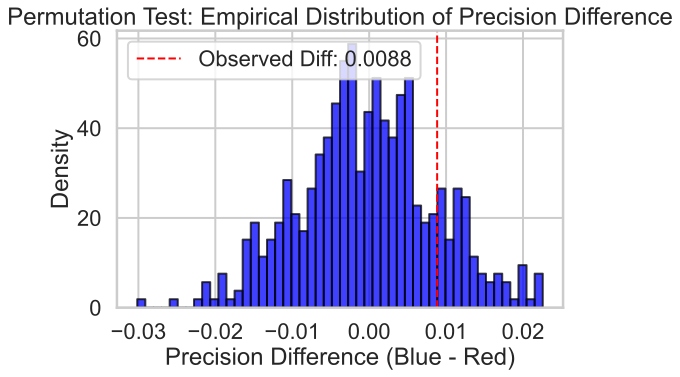

Actual Precision Difference: 0.0088
P-value: 0.3340
No significant difference detected. Model appears fair.


In [19]:
from sklearn.metrics import precision_score

test_blue_mask = X_test["side"] == "Blue"
test_red_mask = X_test["side"] == "Red"

y_pred = searcher.best_estimator_.predict(X_test)

y_true_blue, y_pred_blue = y_test[test_blue_mask], y_pred[test_blue_mask]
y_true_red, y_pred_red = y_test[test_red_mask], y_pred[test_red_mask]

precision_blue = precision_score(y_true_blue, y_pred_blue)
precision_red = precision_score(y_true_red, y_pred_red)
actual_diff = precision_blue - precision_red

n_permutations = 500
permuted_diffs = []

for _ in range(n_permutations):
    shuffled_sides = X_test["side"].sample(frac=1, replace=False).values  
    shuffled_blue_mask = shuffled_sides == "Blue"
    shuffled_red_mask = shuffled_sides == "Red"
    
    y_true_blue_perm, y_pred_blue_perm = y_test[shuffled_blue_mask], y_pred[shuffled_blue_mask]
    y_true_red_perm, y_pred_red_perm = y_test[shuffled_red_mask], y_pred[shuffled_red_mask]
    
    precision_blue_perm = precision_score(y_true_blue_perm, y_pred_blue_perm)
    precision_red_perm = precision_score(y_true_red_perm, y_pred_red_perm)
    
    permuted_diffs.append(precision_blue_perm - precision_red_perm)

permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(actual_diff))

plt.figure(figsize=(8, 5))
plt.hist(permuted_diffs, bins=50, alpha=0.75, color='blue', edgecolor='black', density=True)
plt.axvline(actual_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Diff: {actual_diff:.4f}')
plt.xlabel("Precision Difference (Blue - Red)")
plt.ylabel("Density")
plt.title("Permutation Test: Empirical Distribution of Precision Difference")
plt.legend()
plt.show()

print(f"Actual Precision Difference: {actual_diff:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant difference detected! Potential fairness issue.")
else:
    print("No significant difference detected. Model appears fair.")